In [1]:
# Initialize network object.
from monomerGating import *
#n = network(370.0, 20.0, 0.05, 100.0, 0.0)
n = network(100.0, 1.0, 0.01, 10.0, 50.0)

In [2]:
# Run simulation.
dt = 1.0e-3
tFinal = 100.0
n.evolve(dt, tFinal)

The branching rate is 3.178072165767807 /s


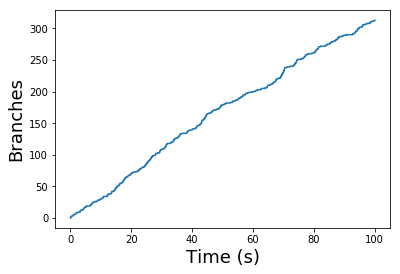

In [3]:
# Plot.
from matplotlib.pyplot import plot, xlabel, ylabel
from numpy import array, zeros, arange, gradient
from scipy.stats import linregress
%matplotlib inline

noBarbsArr = array([a for a, b, c in n.noFilaments])
noBranchesArr = array([b for a, b, c in n.noFilaments])
noCapsArr = array([c for a, b, c in n.noFilaments])
timeArr = linspace(0.0, n.tElapsed, len(noBranchesArr))
slope, intercept, r_value, p_value, std_err = stats.linregress(timeArr, noBranchesArr)
plot(timeArr, noBranchesArr)
xlabel(r"Time (s)", fontsize = 18)
ylabel(r"Branches", fontsize = 18)
print("The branching rate is " + str(slope) + " /s")

Text(0,0.5,'Number of actin-bound sites')

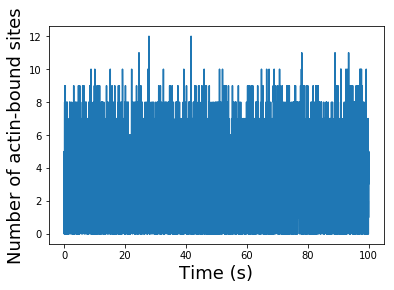

In [4]:
# WH2 domain occupancy
plot(timeArr, n.noFilledArr)
xlabel(r"Time (s)", fontsize = 18)
ylabel(r"Number of actin-bound sites", fontsize = 18)

The capping rate is 1.137269312012062 /s


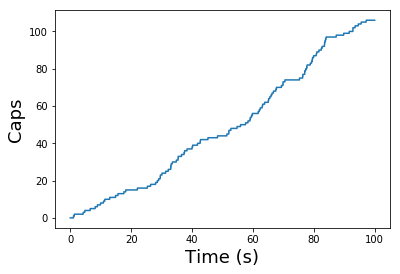

In [5]:
slope, intercept, r_value, p_value, std_err = stats.linregress(timeArr[:-1000], noCapsArr[:-1000])
plot(timeArr, noCapsArr)
xlabel(r"Time (s)", fontsize = 18)
ylabel(r"Caps", fontsize = 18)
print("The capping rate is " + str(slope) + " /s")

The growth rate is 5.311594708275287 nm/s


Text(0,0.5,'Leading edge position')

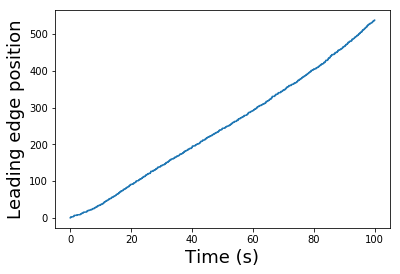

In [6]:
plot(timeArr, n.xEdge)
slope, intercept, r_value, p_value, std_err = stats.linregress(timeArr, n.xEdge)
print("The growth rate is " + str(slope) + " nm/s")
xlabel(r"Time (s)", fontsize = 18)
ylabel(r"Leading edge position", fontsize = 18)

96


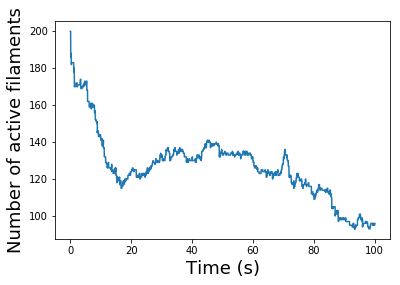

In [7]:
plot(timeArr, n.noActiveArr)
xlabel(r"Time (s)", fontsize = 18)
ylabel(r"Number of active filaments", fontsize = 18)
print(n.noActiveArr[-1])

Text(0,0.5,'Estimated PDF')

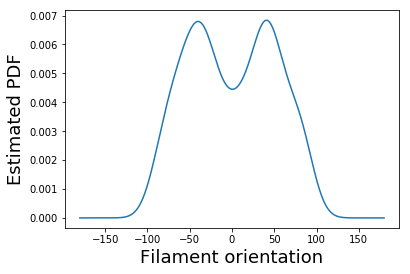

In [8]:
from scipy import stats
from matplotlib.pyplot import hist
thetaArr = n.getAngles() / pi * 180
kde = stats.gaussian_kde(thetaArr)
x = linspace(-180, 180, 1000)
p = kde(x)
plot(x, p)
xlabel('Filament orientation', fontsize = 18)
ylabel('Estimated PDF', fontsize = 18)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 16., 31., 24., 31.,
        43., 40., 29., 21., 20., 27., 22., 34., 48., 44., 16., 19., 25.,
        13.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-180.        , -169.71428571, -159.42857143, -149.14285714,
        -138.85714286, -128.57142857, -118.28571429, -108.        ,
         -97.71428571,  -87.42857143,  -77.14285714,  -66.85714286,
         -56.57142857,  -46.28571429,  -36.        ,  -25.71428571,
         -15.42857143,   -5.14285714,    5.14285714,   15.42857143,
          25.71428571,   36.        ,   46.28571429,   56.57142857,
          66.85714286,   77.14285714,   87.42857143,   97.71428571,
         108.        ,  118.28571429,  128.57142857,  138.85714286,
         149.14285714,  159.42857143,  169.71428571,  180.        ]),
 <a list of 35 Patch objects>)

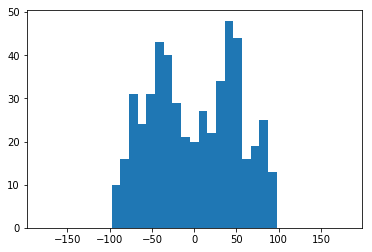

In [9]:
hist(thetaArr, bins = linspace(-180, 180, 36))

The average filament length is 143.3105263157893 nm.


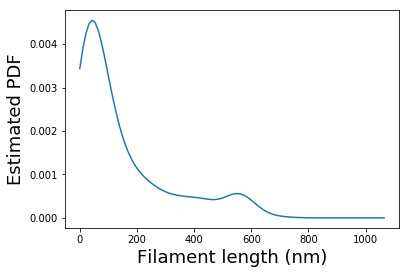

In [10]:
kdeFilamentLength = stats.gaussian_kde(n.filamentLengthArr)
xFilamentLengthArr = linspace(0.0, 1.5 * amax(n.filamentLengthArr), 100)
pFilamentLengthArr = kdeFilamentLength(xFilamentLengthArr)

from numpy import exp, mean

plot(xFilamentLengthArr, pFilamentLengthArr)
ylabel('Estimated PDF', fontsize = 18)
xlabel('Filament length (nm)', fontsize = 18)
print("The average filament length is " + str(mean(n.filamentLengthArr)) + " nm.")